<a href="https://colab.research.google.com/github/Linafe313/Mini-projects/blob/main/Used%20Bmw%20price%20prediction%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Objectives

1) To predict the price of BMW models

2) To minimize the cost function - root mean square error

In [8]:
#Importing data analysis libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

IMPORTING THE DATASET FOR PRICE PREDICTION

In [9]:
df = pd.read_csv("/content/bmw.csv")

In [10]:
#Previewing the data set
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


DATA CLEANING

In [11]:
#Checking for missing values
missing_data = df.isnull()
missing_data.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [12]:
#Check for missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

model
False    10781
Name: model, dtype: int64

year
False    10781
Name: year, dtype: int64

price
False    10781
Name: price, dtype: int64

transmission
False    10781
Name: transmission, dtype: int64

mileage
False    10781
Name: mileage, dtype: int64

fuelType
False    10781
Name: fuelType, dtype: int64

tax
False    10781
Name: tax, dtype: int64

mpg
False    10781
Name: mpg, dtype: int64

engineSize
False    10781
Name: engineSize, dtype: int64



No missing values

## Quick look at the data types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


## Exploring variables - Descriptive Statistics

In [14]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


##Explore categorical variables and class distributions

In [15]:
df["transmission"].value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [16]:
df["fuelType"].value_counts()

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

We have classes that are not balanced. We may need to add weights in the ML - Pipeline

In [17]:
df["model"].value_counts()

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 Z4           108
 6 Series     108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

The variables will be transformed in the pipeline

CHECKING FOR DATA FORMATS

In [18]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

Converting some veriables to suit the model

In [19]:
#df[["price"]] = df[["price"]].astype("float")
df[["tax"]] = df[["tax"]].astype("float")
df[["mileage"]] = df[["mileage"]].astype("float")

Visual exploration of the distribution of variables

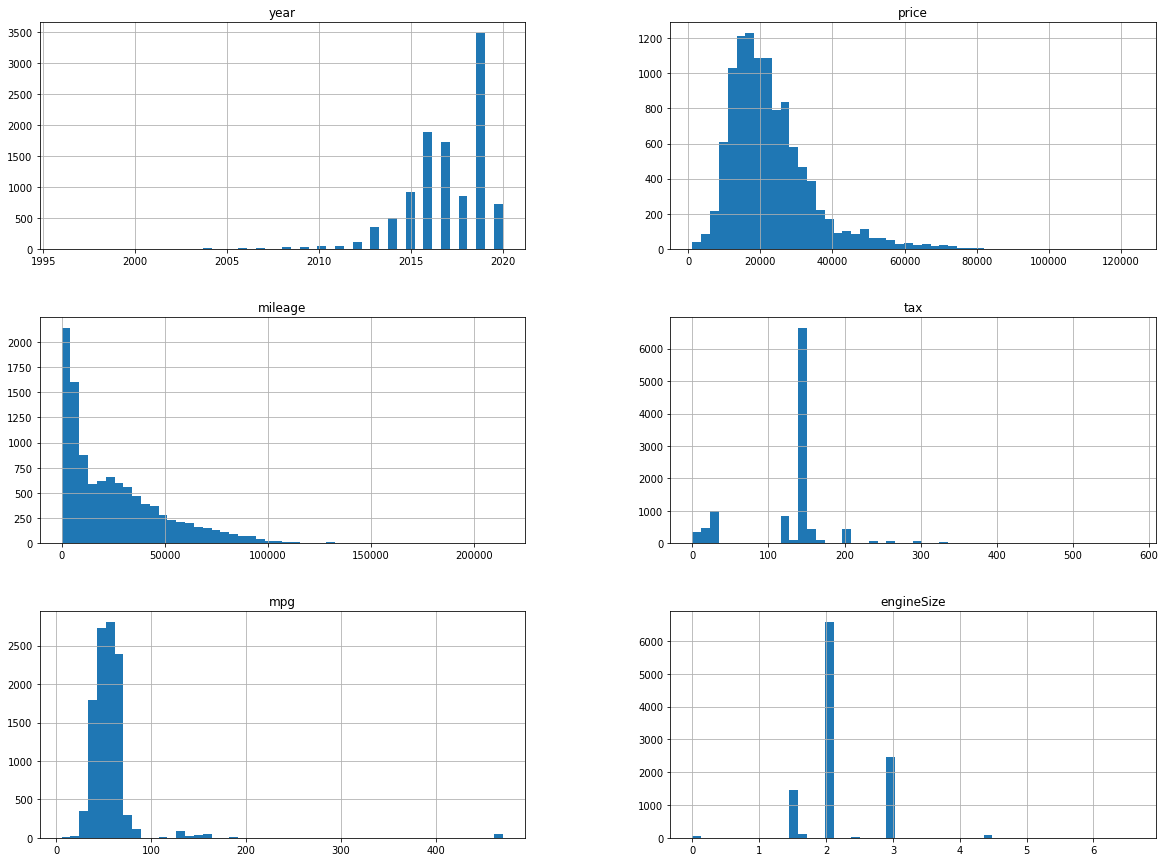

In [20]:
#Visual exploration
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize = (20,15))
plt.show()

Have some skewed distributions as well as outliers. Need to account for this when refining the model or in preprocessing to stardadize the data

Exploring the data - checking for relationships

In [21]:
#calling on correlation command
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending = False)

price         1.000000
year          0.623756
engineSize    0.460196
tax           0.263484
mpg          -0.204882
mileage      -0.605397
Name: price, dtype: float64

Have a some correlation on all numerical values

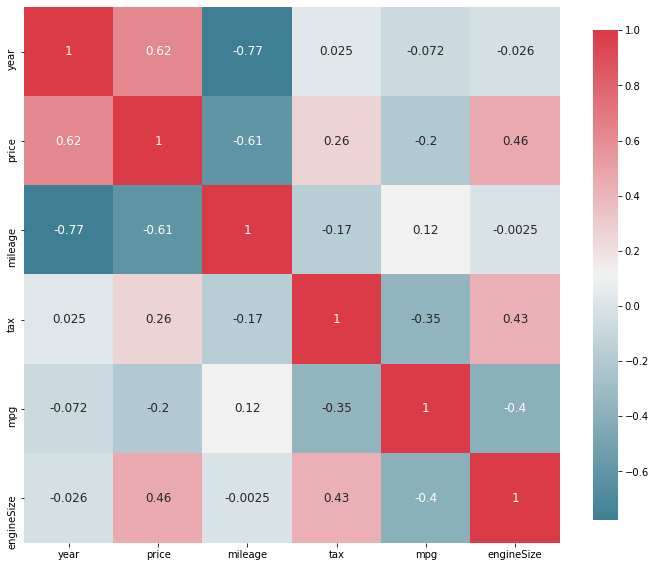

In [22]:
#plotting visual correlation heat map using sns
import seaborn as sns

color_map, ax = plt.subplots (figsize = (12,10))
corr = df.corr(method = 'pearson')
cmap = sns.diverging_palette(220,10, as_cmap = True)
_ = sns.heatmap (corr, cmap = cmap, square = True, cbar_kws={
    'shrink' : .9}, ax=ax, annot = True, annot_kws = {'fontsize':12})

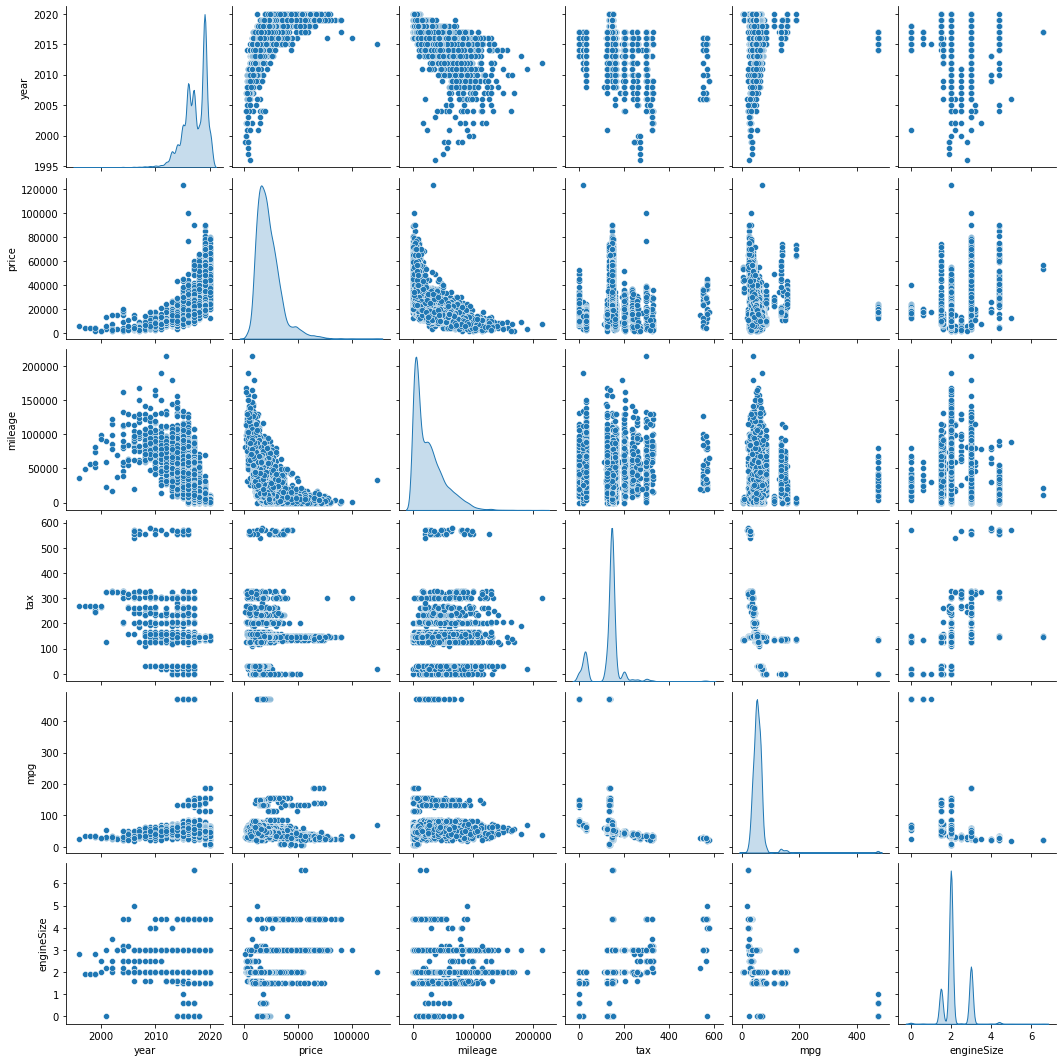

In [23]:
#Pairplot to check further on the correlated variables

sns.pairplot(df, diag_kind="kde")

## Test regplot of some correlated predictors

(0.0, 131812.44792653888)

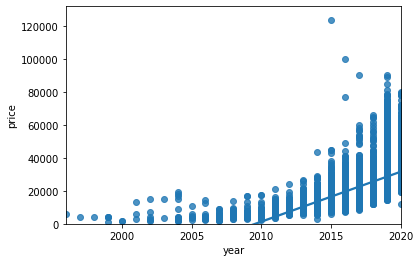

In [24]:
# Year as potential predictor variable of price
sns.regplot(x="year", y="price", data=df)
plt.ylim(0,)

(0.0, 129570.57135373313)

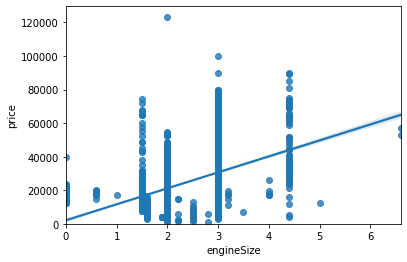

In [25]:
# Engine size as potential predictor variable of price
sns.regplot(x="engineSize", y="price", data=df)
plt.ylim(0,)

(0.0, 129568.8)

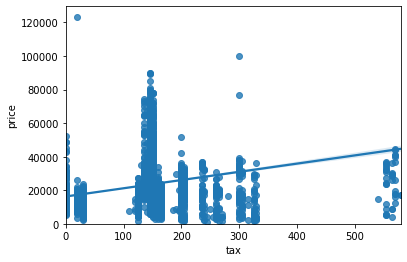

In [26]:
# Tax as potential predictor variable of price
sns.regplot(x="tax", y="price", data=df)
plt.ylim(0,)

(0.0, 131149.62243334923)

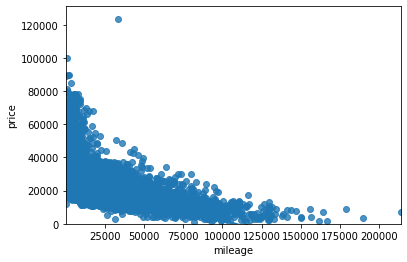

In [27]:
# Engine size as potential predictor variable of price
sns.regplot(x="mileage", y="price", data=df)
plt.ylim(0,)

Some good correlations between predictors and price. Some may be non-linear, to be considered in model development

Test for correlation in categorical variables


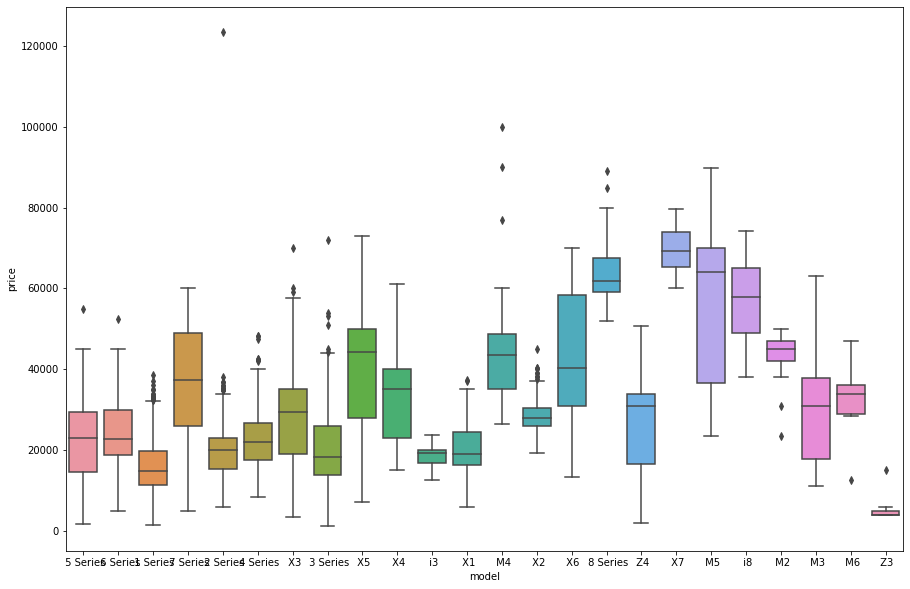

In [28]:
#Have opted for a boxplot

plt.figure(figsize=(15, 10))
sns.boxplot(x="model", y="price", data=df)

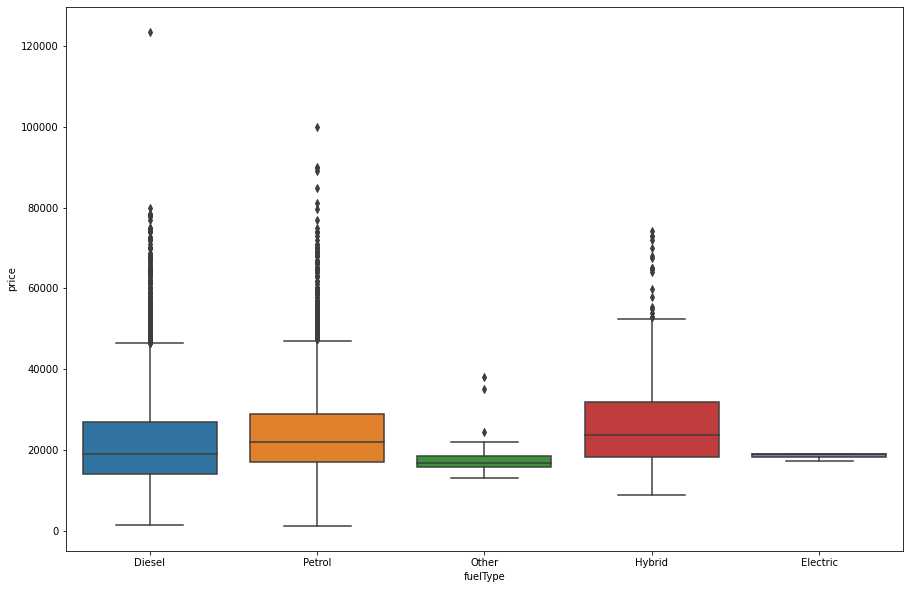

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="fuelType", y="price", data=df)

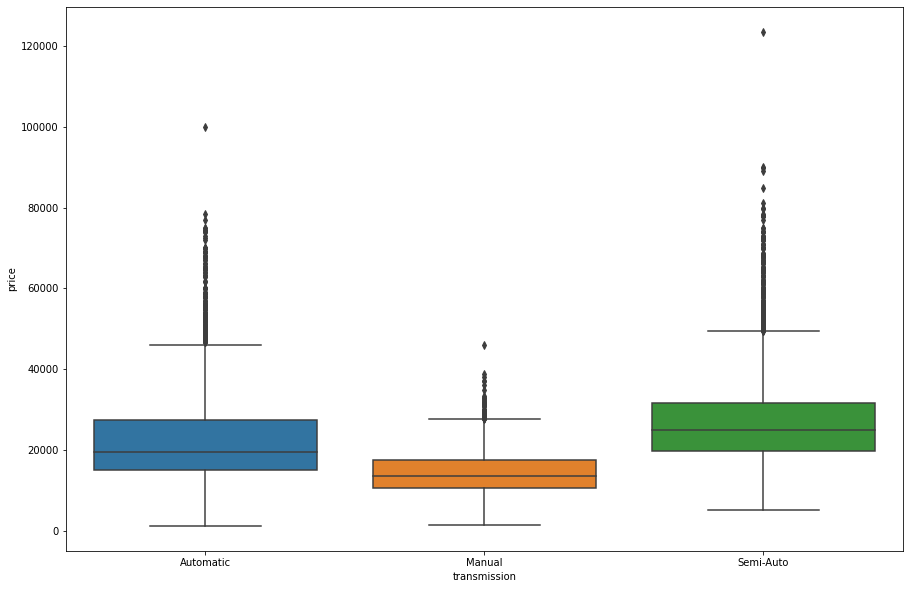

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="transmission", y="price", data=df)

Model-code box plot has the largest variation with price. Model code is the best categorical predictor with a correlation of 0.47

## Check for causation and correlation to select model

In [31]:
from scipy import stats

#EngineSize
#Significant
pearson_coef, p_value = stats.pearsonr(df["engineSize"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4601961878765551  with a P-value of P = 0.0


In [32]:
#Year
#Significant
pearson_coef, p_value = stats.pearsonr(df["year"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.623756079132891  with a P-value of P = 0.0


In [33]:
#Mileage
#Significant
pearson_coef, p_value = stats.pearsonr(df["mileage"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6053967672218263  with a P-value of P = 0.0


In [34]:
#Tax
#Insignificant
pearson_coef, p_value = stats.pearsonr(df["tax"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2634837523452056  with a P-value of P = 1.1303607405277448e-170


In [35]:
#mpg
#Insignificant
pearson_coef, p_value = stats.pearsonr(df["mpg"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.2048823013948638  with a P-value of P = 1.5827764453607185e-102


Most variables have some correlation. However some fail the significance test when it comes to relationships. 

Basic descriptive statistics

In [36]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


Transformation of categorical variables and numerical through a pipeline

Categorical variables

In [44]:
#Creating copy of dataframe
df1 = df.drop("price", axis=1)

In [45]:
#Creating copy of dataframe
df1 = df1.drop("tax", axis=1)

In [46]:
#Creating copy of dataframe
df1 = df1.drop("mpg", axis=1)

In [47]:
#Verifying drop of price variable
df1.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'engineSize'], dtype='object')

In [48]:
#Isolating the categorical variables within the features
categorical_df = df1[["fuelType", "transmission", "model"]]
categorical_df.head(2)

,fuelType,transmission,model
0,Diesel,Automatic,5 Series
1,Petrol,Automatic,6 Series


In [49]:
#Isolating numerical variables in the features
numerical_df = df1[["engineSize", "year", "mileage"]]
numerical_df.head(2)

,engineSize,year,mileage
0,2.0,2014,67068.0
1,2.0,2018,14827.0


Transform independent variables through a preprocessing pipeline

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Building the pipeline

In [51]:
#data transformations
numerical_var = list(numerical_df)
categorical_var = list(categorical_df)

#buiding a pipeline
full_pipeline = ColumnTransformer([
                                   ("num", StandardScaler(), numerical_var),
                                   ("cat", OneHotEncoder(), categorical_var)
])

var_pipeline = full_pipeline.fit_transform(df1)

In [52]:
#checking the transformed data
type(var_pipeline)

scipy.sparse.csr.csr_matrix

## MODEL DEVELOPMENT AND TRAINING

In [58]:
#Importing a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [54]:
#Isolating target variable
price_labels = df[["price"]]
price_labels.head(2)

,price
0,11200
1,27000


# Simple linear regression model

In [55]:
simplereg = LinearRegression()
simplereg.fit (df[["year"]], price_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
simplereg.coef_

array([[3031.24287132]])

In [57]:
simplereg.intercept_

array([-6091522.73423499])

Goodness of fit test - Rsquared

In [64]:
simplereg.score (df[["year"]], price_labels)

0.3890716462552408

# Goodness of fit for simple linear regression is 0.389

# Multiple linear regression model

In [65]:
reg1 = LinearRegression()
reg1.fit(var_pipeline, price_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
#Regression coefficients
reg1.coef_


array([[  2333.33560004,   4258.26239237,  -2904.48892373,
          -583.30633589,   -527.13503345,   2044.77986638,
         -1251.95867485,    317.6201778 ,   -173.99573549,
          -630.81531675,    804.81105225, -13756.56507935,
        -13824.94111936, -10875.09312828, -11216.05748996,
         -9089.26209484,  -8346.21178755,    196.1526576 ,
         20117.72813845,    816.36592828,   1848.20402789,
          2930.04534915,  12830.52039548,  -4186.59604355,
        -11081.10016296,  -9279.95236047,  -4634.57404814,
         -2962.25165634,   3786.83417674,   6120.10274465,
         27752.52449026,   9924.24180632,  -7562.99729397,
         -4041.36443632,  24534.24698628]])

In [67]:
#Regression intercept
reg1.intercept_

array([32274.65198143])

Evaluation of multiple linear regression model

In [68]:
some_data = df.loc[:5]
some_labels = price_labels[:5]
some_data_transformed = full_pipeline.transform(some_data)

print("predictions:" , reg1.predict(some_data_transformed)) #Running regression on transfomed list


predictions: [[11334.88701285]
 [26265.32500127]
 [19681.18015216]
 [14658.93669955]
 [28025.6503255 ]
 [18629.49551286]]


Evaluating the prototype model

In [69]:
price_predictions = reg1.predict (var_pipeline)
reg1_mse = mean_squared_error (price_labels, price_predictions)
reg1_rmse = np.sqrt(reg1_mse)
reg1_rmse

4284.993305867294

In [71]:
reg1.score (var_pipeline, price_labels)

0.8590878117633797

## Prototype model has MSE of 4153 and R2 Score of 0.85

## Quick tests using other models 

In [72]:
#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [73]:
reg2 = DecisionTreeRegressor()
reg2.fit(var_pipeline, price_labels)

price_predictions2 = reg2.predict (var_pipeline)
reg2_mse = mean_squared_error (price_labels, price_predictions2)
reg2_rmse = np.sqrt(reg2_mse)
reg2_rmse

564.2673880571135

In [74]:
reg2.score (var_pipeline, price_labels)

0.9975564672435129

## Second model has RMSE of 265.54 and R2 score of 0.99

In [75]:
reg3 = RandomForestRegressor()
reg3.fit(var_pipeline, price_labels)

price_predictions3 = reg3.predict (var_pipeline)
reg3_mse = mean_squared_error (price_labels, price_predictions3)
reg3_rmse = np.sqrt(reg3_mse)
reg3_rmse

1310.0638324566828

In [76]:
reg3.score (var_pipeline, price_labels)

0.9868285624333165

## Third model has RMSE of 1310 and R2 score of 0.98

Need to test for overfitting

## Visual comparison of models

In [77]:
#Visual comparison of the prediction variation

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion')

    plt.show()
    plt.close()

First model using linear regression

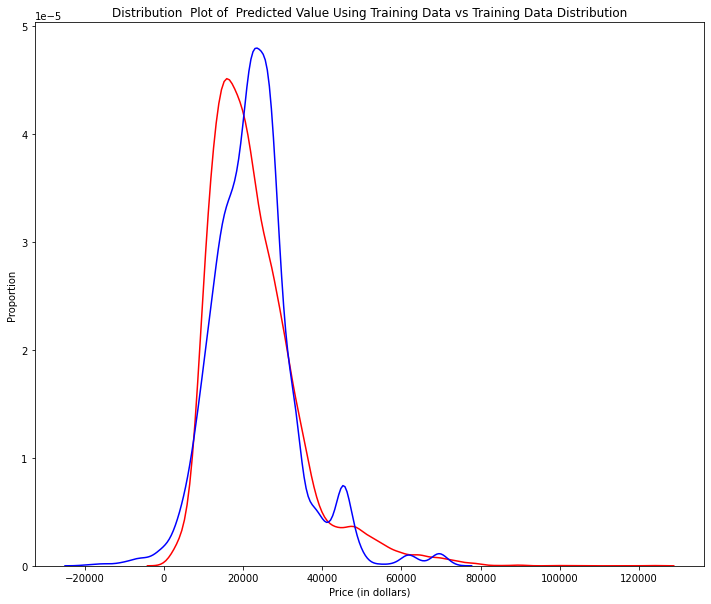

In [78]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(price_labels, price_predictions, "Actual Values (Train)", "Predicted Values (Train)", Title)

Second model with decision tree regressor

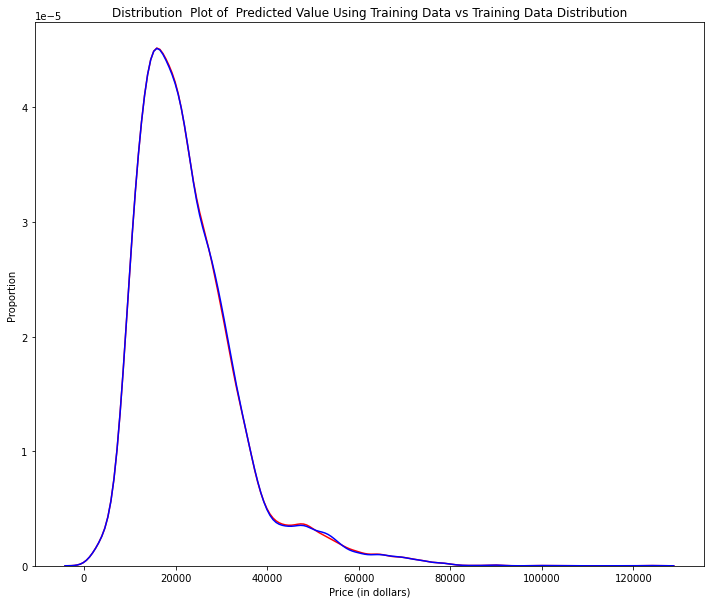

In [79]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(price_labels, price_predictions2, "Actual Values (Train)", "Predicted Values (Train)", Title)

Strong evidence of overfitting in the second model. It may not generalize well on unseen data. We need better evaluation techniques

##Cross validation

Allows us to split datasets into groups for validation

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg2, var_pipeline, price_labels,
                         scoring = "neg_mean_squared_error", cv = 10)

tree_rmse_scores = np.sqrt(-scores)



Cross validation for decision tree

In [81]:
#Function for pulling out scores
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores (tree_rmse_scores)

Scores: [3194.20286176 4805.70665828 4643.59982895 5183.04001602 4706.60781286
 4717.97522628 4525.47215432 3579.15747722 2672.85150476 2917.07413388]
Mean: 4094.5687674334004
Standard deviation: 861.6790672525676


Cross validation for linear regression

In [82]:
scores2 = cross_val_score(reg1, var_pipeline, price_labels,
                         scoring = "neg_mean_squared_error", cv = 10)

regression_scores = np.sqrt(-scores2)



In [83]:
def display_scores(scores2):
  print("Scores:", scores2)
  print("Mean:", scores2.mean())
  print("Standard deviation:", scores2.std())

display_scores (regression_scores)



Scores: [3724.14251463 4012.19410901 3908.42092508 5034.00515771 4700.49675378
 4926.4109179  4807.87537224 3617.95565592 4248.03151568 4652.96961999]
Mean: 4363.250254193804
Standard deviation: 496.96421562406834


Decision tree regressor has a mean rmse score of ***4094.30***

The linear regression has a mean rmse score of ***4363.25***

The RMSE SCORES ARE HIGHER UNDER CROSS VALIDATION. MODEL WAS OVERFITTING

Cross validation for random forest

In [85]:
scores3 = cross_val_score(reg3, var_pipeline, price_labels,
                         scoring = "neg_mean_squared_error", cv = 10)

regression_scores = np.sqrt(-scores3)

In [86]:
def display_scores(scores3):
  print("Scores:", scores3)
  print("Mean:", scores3.mean())
  print("Standard deviation:", scores3.std())

display_scores (regression_scores)

Scores: [2594.07154191 3070.61379435 3590.21432859 4576.20936692 3707.43576387
 3890.45378792 3758.84330387 2667.02207099 2092.45955813 2462.35673375]
Mean: 3240.968025029382
Standard deviation: 742.6087770182105


Decision tree regressor has a mean rmse score of ***4094.30***

The linear regression has a mean rmse score of ***4363.48***

Random forest Regressor has a mean rmse score of **3240**

## Evaluation using the train test split method to ascertain model performance on unseen data

In [87]:
#Calling on split function
from sklearn.model_selection import train_test_split

In [88]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(var_pipeline, price_labels, test_size=0.10, random_state=1)

#Fitting decision tree regressor

In [89]:
lin_reg = DecisionTreeRegressor()
lin_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [90]:
#Prediction test
y_predict = lin_reg.predict(x_test)


In [91]:
y_predict_train = lin_reg.predict(x_train)

In [92]:
rmse = mean_squared_error(y_predict, y_test, squared=False)
rmse

3424.778133683096

In [93]:
rmse2 = mean_squared_error(y_predict_train, y_train, squared=False)
rmse2

553.7782514425768

Decision tree regressor has rmse score of ***553.77*** on **training data**

Decision tree regressor has rmse score of ***3434.77*** on **test data**

The model is overfitting

#Fitting a RandomForestTree

In [97]:
#Prediction test
y_predict2 = reg3.predict(x_test)
y_predict_train2 = reg3.predict(x_train)
rmse3 = mean_squared_error(y_predict2, y_test, squared=False)
rmse3


1147.5633482798937

In [98]:
rmse4 = mean_squared_error(y_predict_train2, y_train, squared=False)
rmse4

1326.907067072335

Random forest regressor has rmse score of ***1147.56*** on **training data**

Random forest regressor has rmse score of ***1326.90*** on **test data**

The model is overfitting slightly

## Fitting a neural network as an alternative model

In [99]:
from sklearn.neural_network import MLPRegressor 

In [100]:
Neu_reg = MLPRegressor()
Neu_reg.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [101]:
neural_predict = Neu_reg.predict(x_test)
neural_predict[:5]

array([28829.67964356, 23857.30416914,   393.76283117,  7115.19458749,
       22217.37274436])

In [102]:
rmse_nn = mean_squared_error(neural_predict, y_test, squared=False)
rmse_nn

6395.266000567106

Neural network has a rmse of ***6395.26***

## Model refinement - Random forest regressor as best performing model

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [104]:
param_grid = [
                   {"n_estimators": [3,10,300], "max_features": [2,4,6,8]},
                   {"bootstrap": [False], "n_estimators": [3,1000], "max_features": [2,3,400]},
                   ]

In [105]:
reg4 = RandomForestRegressor()


In [106]:
grid_search = GridSearchCV(reg4, param_grid, cv=5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)


In [107]:
grid_search.fit (x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [108]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 300}

In [109]:
reg4 = RandomForestRegressor(max_features=8, n_estimators=300)
reg4.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [110]:
#Prediction test
y_predict4 = reg4.predict(x_test)
y_predict_train4 = reg4.predict(x_train)
rmse4 = mean_squared_error(y_predict4, y_test, squared=False)
rmse4

2959.4758510688616

In [111]:
#Prediction train
rmse4 = mean_squared_error(y_predict_train4, y_train, squared=False)
rmse4

1294.7101577883489

In [112]:
Random_search = RandomizedSearchCV(reg4, param_grid, cv=5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

In [113]:
Random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=8,
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=300,
                                   

In [114]:
#Prediction test
y_predict5 = Random_search.predict(x_test)
y_predict_train5 = Random_search.predict(x_train)
rmse5 = mean_squared_error(y_predict5, y_test, squared=False)
rmse5

2953.9812632032563

In [115]:
#Prediction train
rmse6 = mean_squared_error(y_predict_train5, y_train, squared=False)
rmse6

1291.6217273203995

## RandomForestRegressor on polynomial variables

In [116]:
#Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures (degree = 2, include_bias = False)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.fit_transform(x_test)

In [117]:
reg3.fit(x_poly_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
#Prediction test
y_predict66 = reg3.predict(x_poly_test)
y_predict_train66 = reg3.predict(x_poly_train)
rmse66 = mean_squared_error(y_predict2, y_test, squared=False)
rmse66

1147.5633482798937

In [119]:
rmse77 = mean_squared_error(y_predict_train66, y_train, squared=False)
rmse77

1302.9663579970368

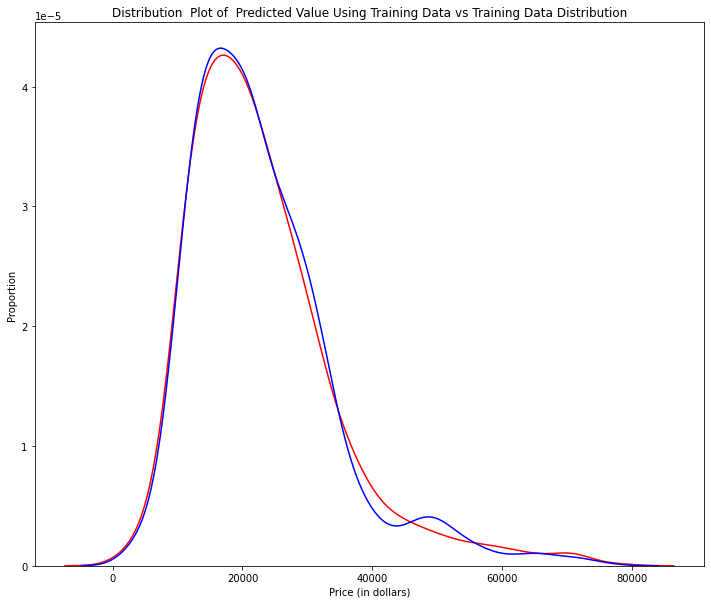

In [120]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_predict66, "Actual Values (Test)", "Predicted Values (Test)", Title)